# 코로나 데이터 분석

## 목표

- 서울시 코로나19 확진자 현황 데이터를 분석하여 유의미한 정보 도출
- 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 특성 엔지니어링, 시각화 방법 학습

## 프로젝트 목차

1. 데이터 읽기: 코로나 데이터를 불러오고 Dataframe 구조를 확인

    1.1. 데이터 불러오기


2. 데이터 정제: 비어 있는 데이터 또는 쓸모 없는 데이터를 삭제

    2.1. 비어있는 column 지우기


3. 데이터 시각화: 각 변수 별로 추가적인 정제 또는 feature engineering 과정을 거치고 시각화를 통하여 데이터의 특성 파악

    3.1. 확진일 데이터 전처리하기
    
    3.2. 월별 확진자 수 출력
    
    3.3. 8월 일별 확진자 수 출력
    
    3.4. 지역별 확진자 수 출력
    
    3.5. 8월달 지역별 확진자 수 출력
    
    3.6. 월별 관악구 확진자 수 출력
    
    3.7. 서울 지역에서 확진자를 지도에 출력

## 프로젝트 개요

2020년 초에 발생한 코로나19 바이러스는 세계적으로 대유행하였고 이에 대한 많은 분석이 이루어지고 있습니다. 유행 초기엔 이를 분석할 데이터가 충분하지 않았지만 6개월 이상 지난 지금은 다양한 데이터 기관에서 코로나 관련 데이터를 공공으로 제공하고 있습니다.

이번 프로젝트에서는 국내 공공데이터 포털에서 제공하는 서울시 코로나19 확진자 현황 데이터를 바탕으로 탐색적 데이터 분석을 수행해보겠습니다. 국내 데이터 중 확진자 비율이 제일 높고 사람이 제일 많은 서울시의 데이터를 선정하였으며, 이를 바탕으로 코로나19의 확진 추이 및 환자 특성에 대해서 데이터를 바탕으로 알아봅시다.

## 1. 데이터 읽기

### 1.1. 데이터 불러오기

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'C:/Users/queenSSH/Desktop/elice/'

# pd.read_csv를 통하여 dataframe 형태로 읽어옴
corona_all = pd.read_csv(path + '서울시 코로나19 확진자 현황.csv')

# 상위 5개 데이터를 출력
corona_all.head(5)

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,5748,10.21.,25530,NaN,NaN,양천구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
1,5747,10.21.,25528,NaN,NaN,강동구,NaN,강남서초 지인모임,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
2,5746,10.21.,25525,NaN,NaN,강남구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
3,5745,10.21.,25517,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
4,5744,10.21.,25504,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y


In [3]:
# dataframe 정보를 요약하여 출력합니다. 
corona_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      5748 non-null   int64  
 1   확진일     5748 non-null   object 
 2   환자번호    5748 non-null   int64  
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      5748 non-null   object 
 6   여행력     459 non-null    object 
 7   접촉력     5748 non-null   object 
 8   조치사항    0 non-null      float64
 9   상태      5357 non-null   object 
 10  이동경로    5520 non-null   object 
 11  등록일     5748 non-null   object 
 12  수정일     5748 non-null   object 
 13  노출여부    5748 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 628.8+ KB


## 2. 데이터 정제

데이터를 읽고 확인했다면 결측값(missing data), 이상치(outlier)를 처리하는 데이터 정제 과정을 한다.

### 2.1. 비어있는 column 지우기

corona_all.info() 코드를 통하여 국적, 환자정보, 조치사항 에 해당하는 데이터가 0 non-null인것을 알 수 있다

In [4]:
# drop 함수를 사용하여 국적, 환자정보, 조치사항 coulmn 데이터를 삭제합니다.
corona_del_col = corona_all.drop(columns = ['국적','환자정보','조치사항'])

In [5]:
# 정제 처리된 dataframe 정보를 출력합니다.
corona_del_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      5748 non-null   int64 
 1   확진일     5748 non-null   object
 2   환자번호    5748 non-null   int64 
 3   지역      5748 non-null   object
 4   여행력     459 non-null    object
 5   접촉력     5748 non-null   object
 6   상태      5357 non-null   object
 7   이동경로    5520 non-null   object
 8   등록일     5748 non-null   object
 9   수정일     5748 non-null   object
 10  노출여부    5748 non-null   object
dtypes: int64(2), object(9)
memory usage: 494.1+ KB


## 3. 데이터 시각화

데이터 정제를 완료한 corona_del_col 데이터를 바탕으로 각 column의 변수별로 어떠한 데이터 분포를 하고 있는지 시각화를 통하여 알아보자

### 3.1. 확진일 데이터 전처리하기

월별, 일별 분석을 위해서는 문자열 형식의 데이터를 나누어 숫자 형 데이터로 변환해 보자

In [6]:
corona_del_col['확진일']

0       10.21.
1       10.21.
2       10.21.
3       10.21.
4       10.21.
         ...  
5743     1.31.
5744     1.30.
5745     1.30.
5746     1.30.
5747     1.24.
Name: 확진일, Length: 5748, dtype: object

In [7]:
# dataframe에 추가하기 전, 임시로 데이터를 저장해 둘 list를 선언

month = []
day = []

for data in corona_del_col['확진일']:
    # split 함수를 사용하여 월, 일을 나누어 list에 저장
    month.append(data.split('.')[0])
    day.append(data.split('.')[1])

In [8]:
# corona_del_col에 `month`, `day` column을 생성하며 동시에 list에 임시 저장된 데이터를 입력

corona_del_col['month']= month
corona_del_col['day']= day

#type를 int64로 변경 .astype() 이용 (데이터를 인식할 수 있게)
corona_del_col['month'].astype('int64')
corona_del_col['day'].astype('int64')

0       21
1       21
2       21
3       21
4       21
        ..
5743    31
5744    30
5745    30
5746    30
5747    24
Name: day, Length: 5748, dtype: int64

### 3.2. 월별 확진자 수 출력

나누어진 `month`의 데이터를 바탕으로 달별 확진자 수를 막대그래프로 출력해보자

In [9]:
# 그래프에서 x축의 순서를 정리하기 위하여 order list를 생성합니다.
order = []

for i in range(1,11):
    order.append(str(i))
    
order

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

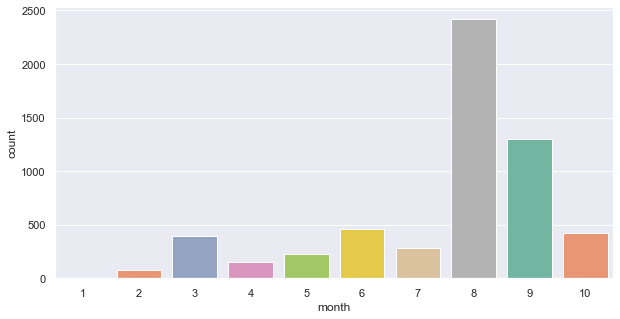

In [11]:
# 그래프의 사이즈를 조절
plt.figure(figsize = (10,5))

# seaborn의 countplot 함수를 사용하여 출력
sns.set(style = 'darkgrid')

#corona_del_col['month'] = x='month', data = corona_del_col
ax = sns.countplot(x='month', data = corona_del_col, palette = "Set2", order = order)

<AxesSubplot:>

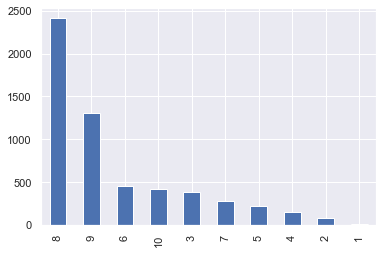

In [13]:
# series의 plot 함수를 사용한 출력 방법도 있습니다.
corona_del_col['month'].value_counts().plot(kind='bar')

In [14]:
# value_counts()는 각 데이터를 세어서 내림차순으로 정리하는 함수이다
corona_del_col['month'].value_counts()

8     2416
9     1304
6      460
10     425
3      391
7      281
5      228
4      156
2       80
1        7
Name: month, dtype: int64

### 3.3. 8월달 일별 확진자 수 출력

월별 확진자 수를 출력해보면 알 수 있듯이 8월에 확진자 수가 가장 많았다

이번엔 8월 동안 확진자 수가 어떻게 늘었는지 일별 확진자 수를 막대그래프로 출력해 보자

In [16]:
# 그래프에서 x축의 순서를 정리하기 위하여 order list를 생성합니다.
order2 = []
for i in range(1,32):
    
    order2.append(str(i))

order2

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31']

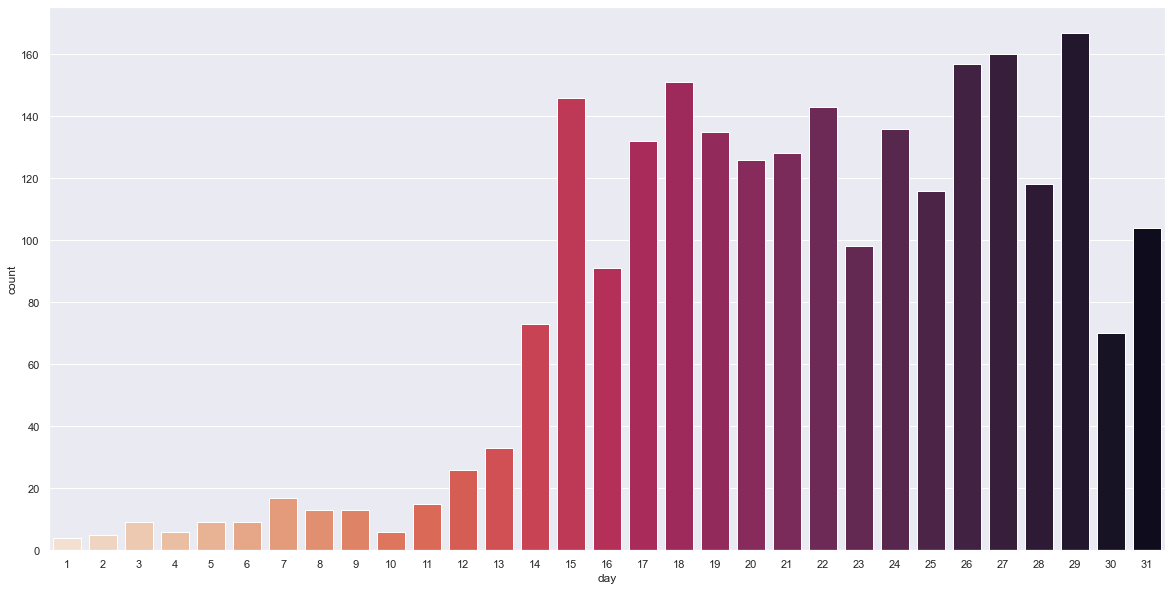

In [19]:
# seaborn의 countplot 함수를 사용하여 출력자

plt.figure(figsize =(20,10))
sns.set(style = 'darkgrid')
ax = sns.countplot(x = 'day', data=corona_del_col[corona_del_col['month']=='8'],palette = 'rocket_r', order = order2)

In [22]:
#8월 평균 확진자수 구하는 2가지 방법
print(corona_del_col[corona_del_col['month'] == '8']['day'].count()/len(order2))
print(corona_del_col[corona_del_col['month'] == '8']['day'].value_counts().mean())

77.93548387096774
77.93548387096774


### 3.4. 지역별 확진자 수 출력

지역 데이터를 간단히 출력해보면 oo구 형태의 문자열 데이터임을 알 수 있다

In [24]:
corona_del_col['지역']

0       양천구
1       강동구
2       강남구
3       관악구
4       관악구
       ... 
5743    성북구
5744    마포구
5745    종로구
5746    중랑구
5747    강서구
Name: 지역, Length: 5748, dtype: object

이번에는 지역별로 확진자가 얼마나 있는지 막대그래프로 출력해 보자

In [26]:
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

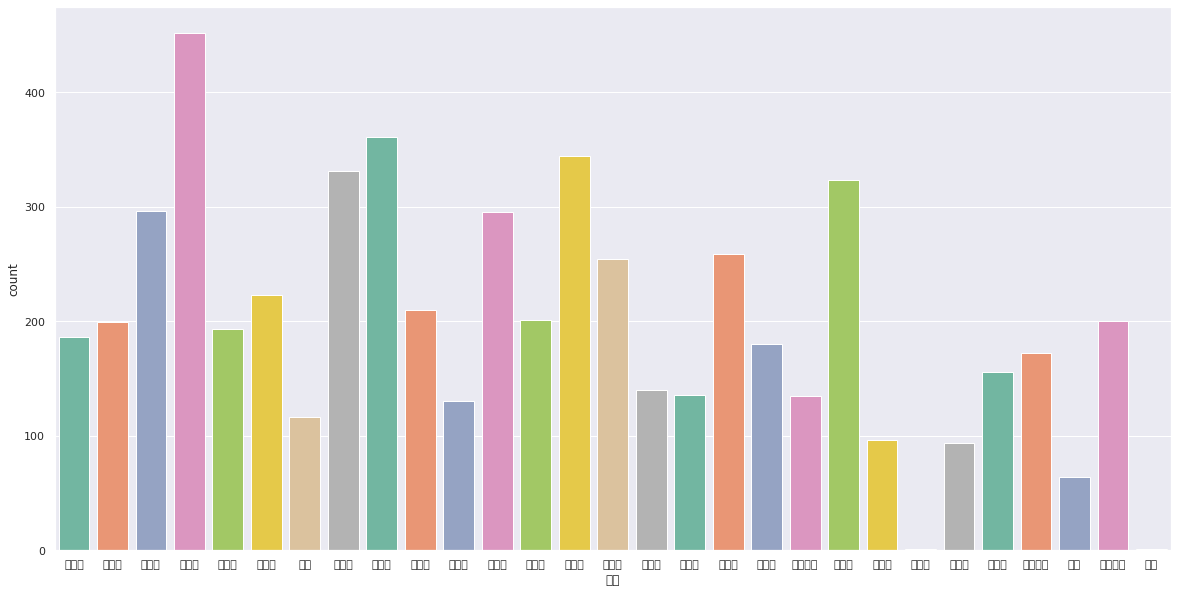

In [31]:
#warning ignore
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (20,10))
# 한글 출력을 위해서 폰트 옵션을 설정한다.
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

ax = sns.countplot(x = '지역', data = corona_del_col, palette = 'Set2')

#### 지역 이상치 데이터 처리

위의 출력된 데이터를 보면 종랑구라는 잘못된 데이터와 한국이라는 지역과는 맞지 않는 데이터가 있음을 알 수 있습니다.

기존 지역 데이터 특성에 맞도록 종랑구 -> 중랑구, 한국 -> 기타로 데이터를 변경해 봅시다.

In [32]:
# replace 함수를 사용하여 해당 데이터를 변경
# 이상치가 처리된 데이터이기에 새로운 Dataframe으로 저장

corona_out_region = corona_del_col.replace({'종랑구' : '중랑구', '한국':'기타'})

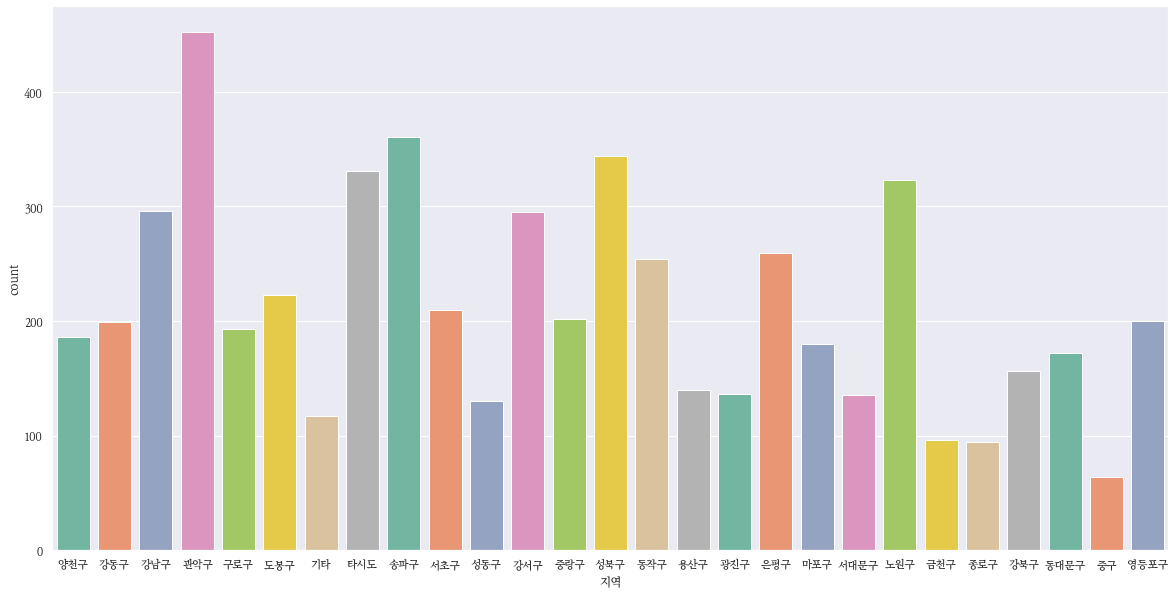

In [40]:
# 이상치가 처리된 데이터를 다시 출력해보자
plt.figure(figsize=(20,10))

sns.set(font = 'KoPubWorldBatang_Pro',
        rc={"axes.unicode_minus":False},
        style='darkgrid')

ax = sns.countplot(x="지역", data=corona_out_region, palette="Set2")

### 3.5. 8월달 지역별 확진자 수 출력

감염자가 많았던 8월에는 지역별로 확진자가 어떻게 분포되어 있는지 막대그래프로 출력해보자

In [35]:
corona_out_region.head()

,연번,확진일,환자번호,지역,여행력,접촉력,상태,이동경로,등록일,수정일,노출여부,month,day
0,5748,10.21.,25530,양천구,NaN,감염경로 조사중,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y,10,21
1,5747,10.21.,25528,강동구,NaN,강남서초 지인모임,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y,10,21
2,5746,10.21.,25525,강남구,NaN,기타 확진자 접촉,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y,10,21
3,5745,10.21.,25517,관악구,NaN,감염경로 조사중,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y,10,21
4,5744,10.21.,25504,관악구,NaN,기타 확진자 접촉,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y,10,21


In [36]:
corona_out_region[corona_out_region['month'] == '8']

,연번,확진일,환자번호,지역,여행력,접촉력,상태,이동경로,등록일,수정일,노출여부,month,day
1271,4477,8.31.,20132,타시도,NaN,감염경로 조사중,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,31
1272,4476,8.25.,17968,타시도,NaN,성북구 사랑제일교회 관련,NaN,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,25
1273,4475,8.26.,18821,타시도,NaN,타시도 확진자 접촉,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,26
1274,4474,8.27.,18818,타시도,NaN,기타 확진자 접촉,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,27
1504,4244,8.30.,20116,타시도,NaN,감염경로 조사중,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4140,1608,8.2.,14382,용산구,일본,해외 접촉 추정,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,2
4141,1607,8.1.,14364,양천구,NaN,송파구 확진자 접촉,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,1
4142,1606,8.1.,14362,종로구,NaN,종로구 지인모임 신명투자,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,1
4144,1604,8.1.,14366,강서구,NaN,강서구 요양시설관련,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,1


In [38]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'cmex10',
 'STIXSizeFourSym',
 'STIXGeneral',
 'STIXGeneral',
 'cmsy10',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'STIXGeneral',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXSizeThreeSym',
 'cmb10',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'cmr10',
 'cmss10',
 'STIXNonUnicode',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'cmmi10',
 'STIXSizeFiveSym',
 'STIXSizeOneSym',
 'cmtt10',
 'DejaVu Serif',
 'DejaVu Sans Display',
 'STIXNonUnicode',
 'SimSun',
 'Franklin Gothic Medium',
 'Han Santteut Dotum',
 'Gadugi',
 'Lucida Console',
 'Candara',
 'Segoe UI',
 'Segoe UI Emoji',
 'Palatino Linotype',
 'Comic Sans MS',
 'KoPubWorldBatang',
 'HCR Batang ExtB',
 'Trebuchet MS',
 'Consolas',
 'Lucida Sans Unicode',
 'Hancom Gothic',
 'Ink Free',
 'Comic Sans MS',
 'HCR Dotum Ext',
 'MV 

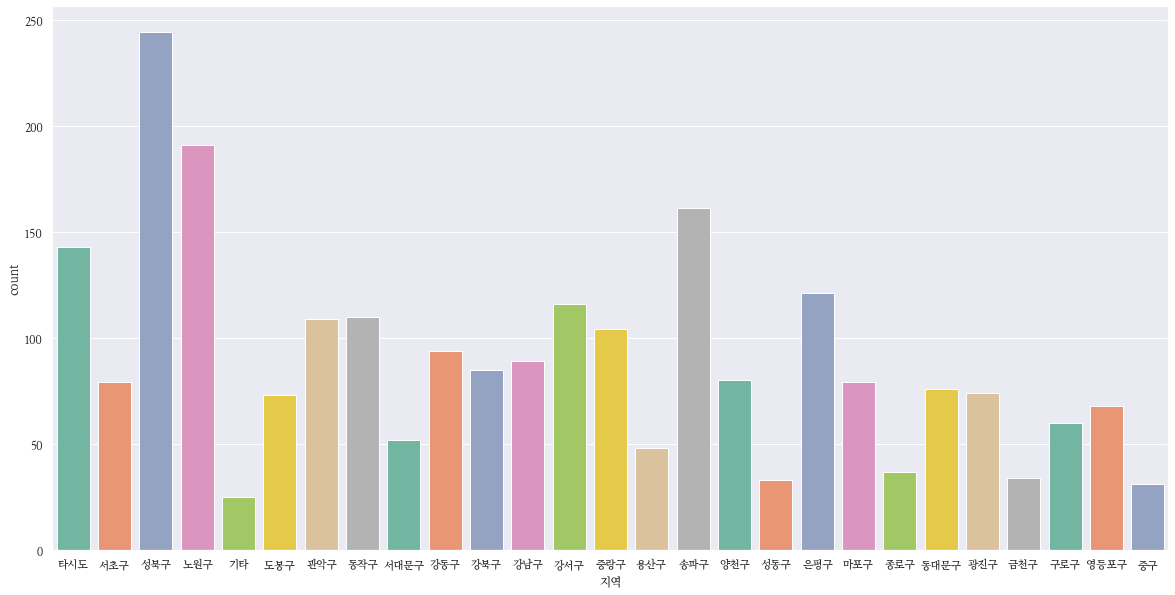

In [39]:
# 그래프를 출력

plt.figure(figsize = (20,10))
sns.set(font="KoPubWorldBatang_Pro", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x = '지역', data= corona_out_region[corona_del_col['month']=='8'], palette = 'Set2')

### 3.6. 월별 관악구 확진자 수 출력

이번에는 확진자가 가장 많았던 관악구 내의 확진자 수가 월별로 어떻게 증가했는지 그 분포를 막대그래프로 출력해 봅시다.

In [41]:
# 해당 column을 지정하여 series 형태로 출력할 수 있다
corona_out_region['month'][corona_out_region['지역'] == '관악구']

3       10
4       10
6       10
7       10
8       10
        ..
5630     3
5661     2
5674     2
5695     2
5711     2
Name: month, Length: 452, dtype: object

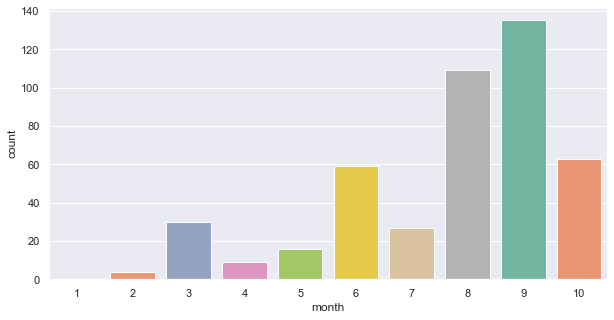

In [43]:
# 그래프를 출력
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
ax = sns.countplot(x = 'month', data = corona_out_region[corona_out_region['지역'] == '관악구'], palette="Set2", order = order)

### 3.7. 서울 지역에서 확진자를 지도에 출력

지도를 출력하기 위한 라이브러리로 folium을 사용해보자

In [51]:
# 지도 출력을 위한 라이브러리 folium을 import 한다
import folium

# Map 함수를 사용하여 지도를 출력
map_osm = folium.Map(location=[37.529622, 126.984307], zoom_start=11)

map_osm

지역마다 지도에 정보를 출력하기 위해서는 각 지역의 좌표정보가 필요하다

이를 해결하기 위해서 서울시 행정구역 시군 정보 데이터를 불러와 사용한다

데이터 출처: https://data.seoul.go.kr/dataList/OA-11677/S/1/datasetView.do

In [49]:
# CRS에 저장합니다.
CRS=pd.read_csv(path + "서울시 행정구역 시군구 정보 (좌표계_ WGS1984).csv")

In [50]:
CRS

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
0,1,11320,도봉구,Dobong-gu,0,37.665861,127.031767
1,2,11380,은평구,Eunpyeong-gu,1,37.617612,126.922700
2,3,11230,동대문구,Dongdaemun-gu,2,37.583801,127.050700
3,4,11590,동작구,Dongjak-gu,3,37.496504,126.944307
4,5,11545,금천구,Geumcheon-gu,4,37.460097,126.900155
5,6,11530,구로구,Guro-gu,5,37.495486,126.858121
6,7,11110,종로구,Jongno-gu,6,37.599100,126.986149
7,8,11305,강북구,Gangbuk-gu,7,37.646995,127.014716
8,9,11260,중랑구,Jungnang-gu,8,37.595379,127.093967
9,10,11680,강남구,Gangnam-gu,9,37.495985,127.066409


저장된 데이터에서 지역명이 서울의 중심지 중구인 데이터를 뽑아보자

In [52]:
CRS[CRS['시군구명_한글'] == '중구']

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
11,12,11140,중구,Jung-gu,11,37.557945,126.99419


이제 for 문을 사용하여 지역마다 확진자를 원형 마커를 사용하여 지도에 출력해 보자

In [57]:
corona_out_region['지역'].value_counts()

관악구     452
송파구     361
성북구     344
타시도     331
노원구     323
강남구     296
강서구     295
은평구     259
동작구     254
도봉구     223
서초구     210
중랑구     202
영등포구    200
강동구     199
구로구     193
양천구     186
마포구     180
동대문구    172
강북구     156
용산구     140
광진구     136
서대문구    135
성동구     130
기타      117
금천구      96
종로구      94
중구       64
Name: 지역, dtype: int64

In [58]:
# corona_out_region의 지역에는 'oo구' 이외로 `타시도`, `기타`에 해당되는 데이터가 존재한다
# 위 데이터에 해당되는 위도, 경도를 찾을 수 없기에 삭제하여 corona_seoul로 저장한다
corona_seoul = corona_out_region.drop(corona_out_region[corona_out_region['지역'] == '타시도'].index)
corona_seoul = corona_seoul.drop(corona_out_region[corona_out_region['지역'] == '기타'].index)

# 서울 중심지 중구를 가운데 좌표로 잡아 지도를 출력
map_osm = folium.Map(location=[37.557945, 126.99419], zoom_start=11)

# 지역 정보를 set 함수를 사용하여 25개 고유의 지역을 뽑아낸다
# set은 중복이 불가능하여 고유 지역만 뽑아냄

for region in set(corona_seoul['지역']):

    # 해당 지역의 데이터 개수를 count에 저장
    count = len(corona_seoul[corona_seoul['지역'] == region])
    
    # 해당 지역의 데이터를 CRS에서 뽑아낸다
    CRS_region = CRS[CRS['시군구명_한글'] == region]

    # CircleMarker를 사용하여 지역마다 원형마커를 생성
    marker = folium.CircleMarker([CRS_region['위도'], CRS_region['경도']], # 위치
                                  radius=count/10 + 10,                 # 범위
                                  color='#3186cc',            # 선 색상
                                  fill_color='#3186cc',       # 면 색상
                                  popup=' '.join((region, str(count), '명'))) # 팝업 설정
    
    # 생성한 원형마커를 지도에 추가합니다.
    marker.add_to(map_osm)

map_osm